In [2207]:
import TO_sim.Q_simul as QSIM
# import TO_sim.analytical.order_sec_parameter as OSP
import TO_sim.analytical.sec_order_parameter2 as OSP2
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import pandas as pd
from scipy.integrate import quad
from scipy import interpolate

In [2514]:
import imp
imp.reload(QSIM)
imp.reload(OSP2)
        

<module 'TO_sim.analytical.sec_order_parameter2' from '/Users/kimgug-young/Desktop/KURAMOTO 1st order/Kuramoto-model/TO_sim/analytical/sec_order_parameter2.py'>

In [2281]:
def g_sec(x,Or,Om):
    g = norm.pdf(x,-Or,1)
    dO = abs(Or-Om)
    return np.where(x<-dO,1e-6,g)

In [2282]:
def get_shift(O_0):
    r_last = norm.cdf(O_0)
    O_samples = np.linspace(O_0,3,1000)
    r_ = norm.cdf(O_samples)
    def get_O_r(r_):
        r_s = np.linspace(r_last,r_,10000,endpoint=False)
        A = norm.ppf(r_s)
        O_r = np.mean(A)
        shift_O = O_r - O_0
        return O_r,shift_O
    FO_r = np.vectorize(get_O_r)
    O_rs,shift_Os = FO_r(r_)
    Ops = O_samples-O_rs
    F_shift  = interpolate.interp1d(Ops,shift_Os, kind='linear',bounds_error=False)
    F_OR  = interpolate.interp1d(O_samples,O_rs, kind='linear',bounds_error=False)

    return F_shift,F_OR


def get_shift2(O_0,shift_O):
    r_last = norm.cdf(O_0)
    O_samples = np.linspace(O_0,3,1000)- shift_O
    r_ = norm.cdf(O_samples)
    def get_O_r(r_):
        r_s = np.linspace(r_last,r_,10000,endpoint=False)
        A = norm.ppf(r_s)
        O_r = np.mean(A)
        shift_temp = O_r - O_0 
        return O_r,shift_temp
    FO_r = np.vectorize(get_O_r)
    O_rs,shift_Os = FO_r(r_)
    Ops = O_samples-O_rs
    F_shift  = interpolate.interp1d(Ops,shift_Os, kind='linear',bounds_error=False)
    F_OR  = interpolate.interp1d(O_samples,O_rs, kind='linear',bounds_error=False)

    return F_shift,F_OR

In [2211]:
K_ = np.linspace(0,15,1000)

In [2530]:
m = 5
F_RMd,F_RMu,F_R0d,F_R0u =  OSP2.Make_R_function(m)

In [2531]:

N = 1000
K = 5.5
Qsimul = QSIM.Q_Norm_simul(N,K=K,m = m,t_end=15000,start_p=True,seed=6)

sol = Qsimul.solve()


In [2532]:
cluster_info = Qsimul.get_cluster()
r_clu_info = Qsimul.get_r_clu()

In [2489]:
O_0 = Qsimul.omega[cluster_info['c_cluster']['0']].max() -Qsimul.omega[cluster_info['c_cluster']['0']].mean()
O_20 = Qsimul.omega[cluster_info['c_cluster']['+']].max() -Qsimul.omega[cluster_info['c_cluster']['0']].mean()

In [2490]:
omega =Qsimul.omega
r0 = r_clu_info['r_clu_mean']['0'][-1]

In [2491]:
F_R0u(K),r0

(array(0.63062265), 0.6579847001991579)

In [2519]:
_,rpt,_,rp_,_,_ = OSP2.get_r_sec_np(K_match,m,F_RMu)

In [2510]:
rp = r_clu_info['r_clu_mean']['+'][-1]

In [2516]:
rp_,rp,rpt

(array([0.09348988]), 0.1035505014611199, array([0.09256892]))

In [2536]:
I_FR0u = interpolate.interp1d(F_R0u(K_),K_)
K_match = I_FR0u(r0)
O_O = 4/np.pi * np.sqrt(F_RMu(K_match)*K_match/m) - 0.3056*1/np.sqrt(K_match*F_RMu(K_match)*m**3)

In [2513]:
r_clu_info['r_clu_mean']['+_total'][-1]


0.09977661924711506

In [2538]:
# RM = F_RMu(K)
r0 = r_clu_info['r_clu_mean']['0'][-1]
rpt = r_clu_info['r_clu_mean']['+_total'][-1]
rp = r_clu_info['r_clu_mean']['+'][-1]
O_p = 4/np.pi * np.sqrt(r0*K/m) - 0.3056*1/np.sqrt(K*r0*m**3)
shift_O = (K**2*r0*rp)/(2*m*(1/m**2+(O_O)**2)) - (K**2*rp*rp)/(2*m**2*O_O*(1/m**2+(2*O_O)**2)) #+ (K**2*rp_*rp)/(2*m*(1/m**2+(O_O)**2))
O_ps = 4/np.pi * np.sqrt(rp*K_match/m) - 0.3056*1/np.sqrt(K_match*rp*m**3)
print(shift_O)
print(O_O)

0.11085596353336127
1.1310469440046969


In [2539]:
rp

0.06616146713678243

In [2540]:
(K**2*rp*rp)/(2*m*(1/m**2+(2*O_O)**2)),- (K**2*rp*rp)/(2*m**2*O_O*(1/m**2+(2*O_O)**2)),(K**2*rp*rp)/(2*m*(1/m**2+(O_O)**2))

(0.0025676315975893794, -0.0004540274143702946, 0.010036975678149169)

In [2541]:
print(omega[cluster_info['c_cluster']['0']].max())
omega[cluster_info['c_cluster']['+']].mean()

1.141297231736094


1.3496071852101448

In [2542]:
cluster_info['c_speed']['+']

1.205826179109599

In [2543]:
O_O+shift_O,O_0+shift_O,Qsimul.cluster_info['c_speed']

(1.241902907538058,
 1.072547531223969,
 {'0': 0.00707406087045292,
  '-': -1.191302862913274,
  '+': 1.205826179109599,
  '+_total': 1.5286161953425417,
  '-_total': -1.510485645421567})

In [2544]:
F_S,F_OR = OSP2.get_shift(O_O)

In [2545]:
F_OR(O_20)
# O_2O

array(1.32438042)

In [ ]:
OPR = 4/np.pi*np.sqrt()

In [2529]:
omega[cluster_info['c_cluster']['0']].mean()

-0.002897181141446037

array(1.32438042)

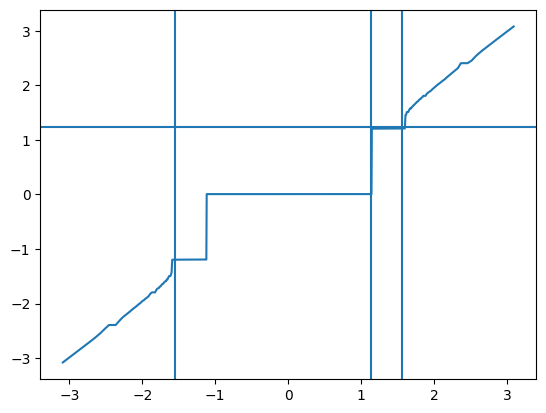

In [2546]:
plt.plot(omega,cluster_info['avg_dtheta_last'])
plt.axhline(O_O+shift_O)
plt.axvline(O_O)
plt.axvline(O_O+shift_O+O_ps)
plt.axvline(-(O_O+shift_O+O_ps))
F_OR(O_20)

# plt.axhline(1.1093636341415467)


In [2292]:
K_t = np.linspace(0,15,30000)

In [2337]:
RP = norm.cdf(O_20) - norm.cdf(O_0)
R0 = norm.cdf(O_0) - norm.cdf(-O_0)
shift_O = (K**2*R0*RP)/(2*m*(1/m**2+(O_O)**2)) + (K**2*RP*RP)/(2*m*(1/m**2+(O_O)**2))
print(shift_O)

0.21466340068317954


In [2338]:
shift_O = (K**2*r0*rp)/(2*m*(1/m**2+(O_O)**2)) + (K**2*rp*rp)/(2*m*(1/m**2+(O_O)**2))
print(shift_O)

0.2020032016130089


In [2295]:
b = 0.1
x = np.linspace(0,shift_O,1000)
RP_ = norm.cdf(x+K_*b+O_0) - norm.cdf(O_0)

x_ = (K_**2*R0*RP_)/(2*m*(1/m**2+(O_O)**2)) + (K_**2*RP_*RP_)/(2*m*(1/m**2+(O_O)**2))
# quad(lambda x: norm.pdf(x)*np.sqrt(1-x/(K_*R0)),-O_0,O_0)


In [2296]:
O_0,OP.iloc[-1]

(1.088477557137923, 1.0779515123491425)

In [2297]:
Ks_back = np.arange(0,K,0.1)

In [2298]:
def F_sec0(r,K,m,O_0,O_20,F_R0,F_S,F_OR,g=g_sec):
    X = K*r
    a = 1/np.sqrt(X*m)
    b = 4/np.pi * a - 0.3056*a**3
    r_0 = F_R0(K)
    bs = np.where(np.where(a>1.193,1,b)>=1,1,b)
    a0 = 1/np.sqrt(K*r_0*m)

    shift_O = K**2 * r_0 * r/(2*m*(1/m**2+(O_0)**2)) + K**2 * r * r/(2*m*(1/m**2+(O_0)**2))
    O_pm = O_0

    shift_temp = F_S(X-shift_O)
    MAX = O_0+shift_temp+X
    # if MAX<O_20:
        # shift_temp = F_S(X)
        # O_20 = MAX
    OM = -shift_temp
    OP = min(O_20-O_0-shift_temp,X)
    
    if X<shift_temp:
        OM = 0
        OP = 0
    
    integrand_drift = lambda x:1/(2*(m*(x+shift_O)**2+1/m))*g(x,O_pm+shift_O,O_pm)
    integrand_lock = lambda x:g(x,O_pm+shift_temp,O_pm)*np.sqrt(1-((x)/X)**2)

    I_d,err = quad(integrand_drift,OP,np.inf,limit=200)
    I_l,err = quad(integrand_lock,OM ,OP,limit=200)
    
    return I_l/X-I_d,I_l/X,-I_d,shift_temp
get_F20 = np.vectorize(F_sec0)

def get_r_sec0(K,m,O_0,O_20,FR,F_S,F_OR,samples=200):
    r0_ =  FR(K)
    r_sd,r_su = np.nan,np.nan
    r_sd_l,r_su_l = np.nan,np.nan
    mu = np.nan
    md = np.nan
    shift_Os = np.nan
    if (K == 0)or (m==0):
        return r_sd,r_su,r_sd_l,r_su_l
    r_test = np.linspace(1e-5,(1-r0_)/2,samples)
    F2,Fl,Fd,shift_Os = get_F20(r_test,K,m,O_0,O_20,FR,F_S,F_OR)
    R2_interpolate  = interpolate.interp1d(r_test,F2, kind='linear',bounds_error=False)
    Rl_interpolate  = interpolate.interp1d(r_test,Fl, kind='linear',bounds_error=False)
    r_test2 = np.linspace(1e-5,(1-r0_)/2,5000)
    Fs = R2_interpolate(r_test2)
    Fls = Rl_interpolate(r_test2)
    cross_point = np.sign((Fs[0:-1]-1/K)*(Fs[1:]-1/K))*(-0.5) + 0.5
    arg_check, = np.where(cross_point)

    r_sec = (r_test2[arg_check] +r_test2[arg_check+1])/2
    F_ls = (Fls[arg_check] +Fls[arg_check+1])/2
    if len(r_sec)>=3:
        r_su = r_sec[-1]
        r_su_l = F_ls[-1]*K*r_su
    if len(r_sec)==2:
        r_sd,r_su = r_sec
        r_sd_l,r_su_l = F_ls[0]*K*r_sd,F_ls[1]*K*r_su

    if len(r_sec)==1:
        r_su = r_sec
        r_su_l = F_ls*K*r_su


    return r_sd,r_su,r_sd_l,r_su_l
get_r_sec0_np = np.vectorize(get_r_sec0)

In [2465]:
df_Km = pd.read_excel('Order parameter and secondary cluster NEW.xlsm',index_col=[0,1])
df_m = df_Km.query(f'm == {m}').reset_index().set_index('K')

In [2466]:
Ks = df_m['r+_ul'].index.to_numpy(float)
A_r2u = df_m['r+_ul'].to_numpy(float)
A_r2ut = df_m['r+_total_u'].to_numpy(float)

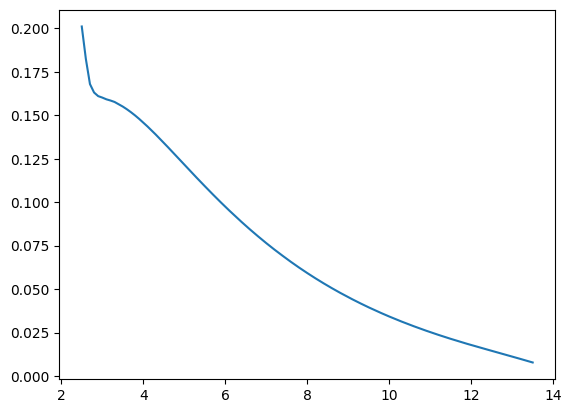

In [2340]:
plt.plot(Ks,A_r2u)

In [2467]:
I_R2u = interpolate.interp1d(A_r2u,Ks,kind='linear',bounds_error=False)
F_R2u = interpolate.interp1d(Ks,A_r2u,kind='linear',bounds_error=False)

In [2468]:
Theta_last = Qsimul.Theta_last
TLO_back_info = Qsimul.TLO_back(Theta_last,K)

KeyboardInterrupt: 

In [2315]:
Ks_back = TLO_back_info['Ks']
r_info_back = TLO_back_info['r_info']
cluster_info_back = TLO_back_info['cluster_info']

In [2343]:
O_ps = cluster_info_back['max_O+'].to_numpy(float)

5.708200679494761
5.5


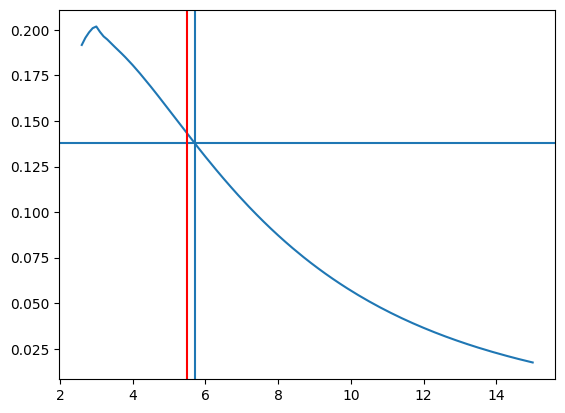

In [2469]:
plt.plot(df_m['r+_ul'])
plt.axhline(rp)
plt.axvline(I_R2u(rp))
# plt.axvline(I_R2u(r_info_back['r+'].to_numpy(float)[-1]))
plt.axvline(K,color='red')
print(I_R2u(rp))
print(K)

In [2348]:
O_O

0.9779043560951163

1.5417352941803597

In [2280]:
np.random.random(100)

array([0.95036579, 0.38393151, 0.26742967, 0.23380337, 0.33478214,
       0.2903152 , 0.1158062 , 0.19407627, 0.86936524, 0.63798453,
       0.25774446, 0.89704991, 0.70511372, 0.36475594, 0.98199465,
       0.26178431, 0.43303846, 0.51090929, 0.91245853, 0.54666673,
       0.74834918, 0.11855705, 0.86746364, 0.97147912, 0.88821771,
       0.207725  , 0.93803122, 0.31437999, 0.0535972 , 0.05379857,
       0.97458177, 0.45109407, 0.91859328, 0.03648036, 0.75786726,
       0.13695045, 0.30716737, 0.44870798, 0.83140609, 0.87366027,
       0.71469962, 0.32418093, 0.82390998, 0.21397319, 0.58540971,
       0.02949992, 0.87847456, 0.63620168, 0.24257098, 0.35613298,
       0.49551588, 0.79076977, 0.487326  , 0.66090936, 0.00716404,
       0.26968492, 0.6852142 , 0.99567044, 0.54970113, 0.22639787,
       0.66409097, 0.91016459, 0.77763411, 0.13133664, 0.34912755,
       0.36480054, 0.93450047, 0.38522017, 0.51301063, 0.36450249,
       0.9818371 , 0.1922077 , 0.14854018, 0.34422651, 0.06647

In [2204]:
r0 = r_info_back['r0'].to_numpy(float)[-1]
I_FR0u = interpolate.interp1d(F_R0u(K_t),K_t)
K_match = I_FR0u(r0)
O_O = 4/np.pi * np.sqrt(F_RMu(K_match)*K_match/m) - 0.3056*1/np.sqrt(K_match*F_RMu(K_match)*m**3)
F0_RMd,F0_RMu,F0_R0d,F0_R0u =  OSP2.Make_R0_function(m,O_O)

In [2155]:
O_0,O_O

(1.0779515123491425, 1.0789095244063076)

In [2156]:
O_O = 4/np.pi * np.sqrt(r0*K/m) - 0.3056*1/np.sqrt(K*r0*m**3)
O_O

1.0914871821864642

In [2159]:
r_info_back['r+'].to_numpy(float)[-1]

0.07904067951445629

In [2160]:
RP_ =  r_info_back['r-'].to_numpy(float)[-2]
K_b = I_R2u(RP_)
F_R2u(K_b),RP_

# O_O = 4/np.pi * np.sqrt(r0*K/m) - 0.3056*1/np.sqrt(K*r0*m**3)
O_P2 = 4/np.pi * np.sqrt(RP_*K/m) - 0.3056*1/np.sqrt(K*RP_*m**3)
shift_O = (K**2*r0*RP_)/(2*m*(1/m**2+(O_O)**2)) + (K**2*RP_*RP_)/(2*m*(1/m**2+(O_O)**2))
O_2O = O_O+ shift_O + O_P2
# O_P2
print(shift_O)

0.15869672754792408


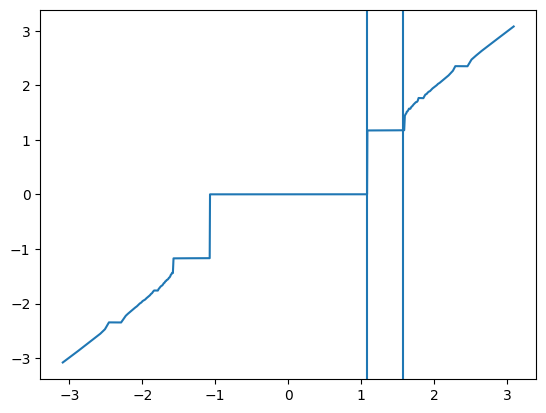

In [2161]:
plt.plot(omega,TLO_back_info['avg_dtheta'].iloc[-1])
plt.axvline(O_O)
plt.axvline(O_2O)

Text(0.5, 0, '$K$')

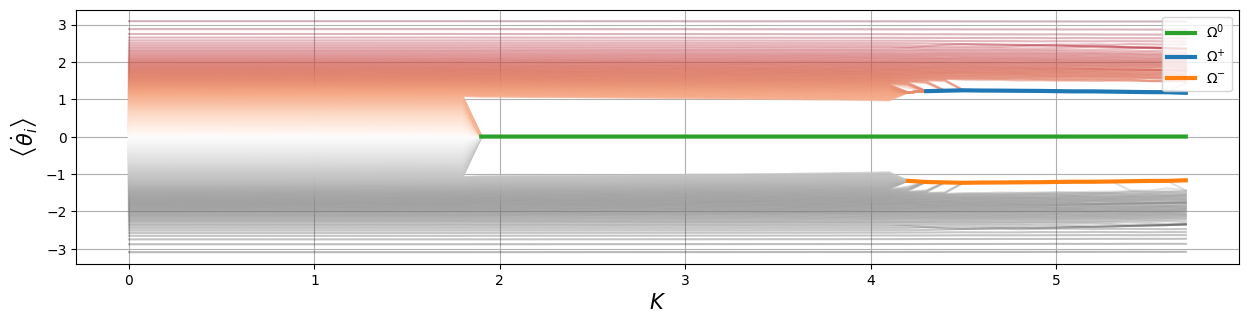

In [2164]:
# plt.plot(TLO_back_info['avg_dtheta'].iloc[iloc+6]);
# plt.plot(TLO_back_info['avg_dtheta'].iloc[iloc+7]);
# plt.plot(TLO_back_info['avg_dtheta'].iloc[iloc+10]);
# plt.plot(TLO_back_info['avg_dtheta'].iloc[iloc+15]);
plt.figure(figsize=(15,3.3),dpi=100)
ln = plt.plot(TLO_back_info['avg_dtheta']);
NORM = lambda x :(x-np.min(x))/(np.max(x)-np.min(x))
omega = Qsimul.omega
color = plt.cm.RdGy_r(NORM(omega),alpha=0.3)
# ln = plt.plot(t[sum_time:],avg_dtheta);
sca = plt.scatter(0*omega,0*omega,c=omega,s=0);
for i,l in enumerate(ln):
    l.set_color(color[i])
plt.plot(TLO_back_info['cluster_info']['v0'],lw=3,color='tab:green',label=r'$\Omega^{0}$')
plt.plot(TLO_back_info['cluster_info']['v+'],lw=3,color='tab:blue',label=r'$\Omega^{+}$')
plt.plot(TLO_back_info['cluster_info']['v-'],lw=3,color='tab:orange',label=r'$\Omega^{-}$')
# plt.axhline(0,color='black',zorder=0)
plt.ylabel(r'$\left\langle\dot{\theta}_i\right\rangle$',size=15)
plt.legend()
plt.grid()
# plt.xlim(0,7)
plt.xlabel('$K$',fontsize=15)

In [2165]:
O_O,O_0,OP.iloc[-1]

(1.0789095244063076, 1.0779515123491425, 1.0471749370550163)

In [2166]:
shift_Os =  Ks_back**2 * TLO_back_info['r_info']['r+_total'] * TLO_back_info['r_info']['r0']/(2*m*(1/m**2+(O_O)**2)) #+  Ks_back**2 * TLO_back_info['r_info']['r+_total'] * TLO_back_info['r_info']['r+_total']/(2*m*(1/m**2+(O_O)**2))
shift_OFs =  Ks_back**2 * TLO_back_info['r_info']['r+_total'] * TLO_back_info['r_info']['r0']/(2*m*(1/m**2+(O_O)**2)) +  Ks_back**2 * TLO_back_info['r_info']['r+_total'] * TLO_back_info['r_info']['r+_total']/(2*m*(1/m**2+(O_O)**2))

In [2167]:
CLUP = TLO_back_info['CLU_idx']['CLU+']

In [2168]:
O_2O,O_O

(1.5711816449613831, 1.0789095244063076)

In [2169]:
OP2 =TLO_back_info['cluster_info']['max_O+']-TLO_back_info['cluster_info']['mean_O0']
OP =TLO_back_info['cluster_info']['max_O0']-TLO_back_info['cluster_info']['mean_O0']

In [2170]:
O_P2s = 4/np.pi * np.sqrt(TLO_back_info['r_info']['r+_total'].to_numpy(float)*Ks_back/m) - 0.3056*1/np.sqrt(Ks_back*TLO_back_info['r_info']['r+_total'].to_numpy(float)*m**3)

In [2201]:
F_S,F_OR = get_shift(O_O)

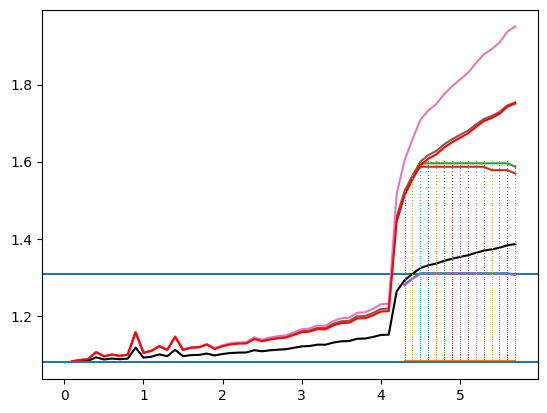

In [2203]:
plt.plot(TLO_back_info['cluster_info']['mean_O+']-TLO_back_info['cluster_info']['mean_O0'])
plt.plot(TLO_back_info['cluster_info']['min_O+']-TLO_back_info['cluster_info']['mean_O0'])
plt.plot(TLO_back_info['cluster_info']['max_O+']-TLO_back_info['cluster_info']['mean_O0'])
plt.plot(np.abs(TLO_back_info['cluster_info']['min_O-'])-TLO_back_info['cluster_info']['mean_O0'])
# plt.axhline(O_O+shift_O)
plt.axhline(F_OR(O_ps[-2]))

plt.plot(Ks_back,F_OR(O_ps))
# plt.plot(Ks_back,F_OR(O_ps)+Ks_back*TLO_back_info['r_info']['r+_total'] - F_S(Ks_back*TLO_back_info['r_info']['r+_total'].to_numpy(float)))
# plt.plot(Ks_back,shift_Os+O_O+Ks_back*TLO_back_info['r_info']['r+'])
# plt.plot(Ks_back,F_OR(O_ps)-Ks_back*TLO_back_info['r_info']['r+_total'])
# plt.plot(Ks_back,O_O+F_S(Ks_back*TLO_back_info['r_info']['r+_total'].to_numpy(float)))#+Ks_back*TLO_back_info['r_info']['r+_total'])
plt.plot(Ks_back,O_O+F_S(Ks_back*TLO_back_info['r_info']['r+_total'].to_numpy(float))+Ks_back*TLO_back_info['r_info']['r+_total']-shift_Os.fillna(0)/2)
plt.plot(Ks_back,O_O+2*Ks_back*TLO_back_info['r_info']['r+_total'])#-shift_Os.fillna(0)/2)
# plt.plot(Ks_back,O_O+Ks_back*TLO_back_info['r_info']['r+_total']+shift_Os.fillna(0).iloc[-1])
# plt.plot(Ks_back,F_OR(O_ps)-shift_OFs.fillna(0)/2+Ks_back*TLO_back_info['r_info']['r+_total'].to_numpy(float) )
plt.plot(Ks_back,O_O+F_S(Ks_back*TLO_back_info['r_info']['r+_total'].to_numpy(float)),color='black')# +Ks_back*TLO_back_info['r_info']['r+_total'])
plt.plot(Ks_back,O_O+F_S(Ks_back*TLO_back_info['r_info']['r+_total'].to_numpy(float)-shift_Os.fillna(0)) +Ks_back*TLO_back_info['r_info']['r+_total'],color ='red')

# plt.axhline(shift_Os.fillna(0).iloc[-1] + O_O)
for K_,O in zip(CLUP.index,CLUP.to_numpy()):
    try:
        plt.plot(K_*np.ones_like(O),omega[O],',')
    except IndexError:pass
plt.axhline(O_O)
# plt.xlim(4,5.5)

In [2173]:
shift_OFA = Ks_back**2 * rs_u * TLO_back_info['r_info']['r0']/(2*m*(1/m**2+(O_O)**2)) +  Ks_back**2 * rs_u * rs_u/(2*m*(1/m**2+(O_O)**2))
O_P2A = 4/np.pi * np.sqrt(rs_u*Ks_back/m) - 0.3056*1/np.sqrt(Ks_back*rs_u*m**3)

ValueError: operands could not be broadcast together with shapes (58,) (151,) 

In [2174]:
KRP = Ks_back*TLO_back_info['r_info']['r+'].to_numpy(float)

In [2175]:
O_20, OP2.iloc[-1]

(1.5607287863679526, 1.5867671442457578)

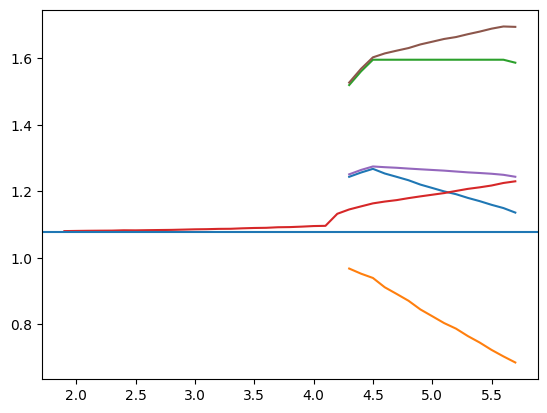

In [2176]:
plt.plot(Ks_back,OP2 - KRP,)
plt.plot(Ks_back,OP2 - 2*KRP)
plt.plot(Ks_back,OP2)
plt.plot(Ks_back,O_O+shift_OFs)
plt.plot(Ks_back,F_OR(OP2.to_numpy(float)-shift_OFs.to_numpy(float)))
plt.plot(Ks_back,F_OR(OP2.to_numpy(float)-shift_OFs.to_numpy(float))+KRP)
plt.axhline(O_O)


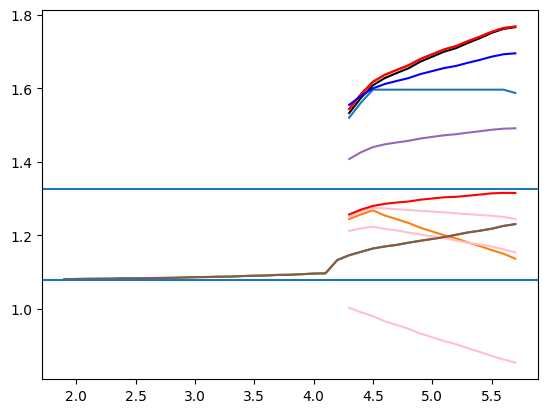

In [2177]:
KRP = Ks_back*TLO_back_info['r_info']['r+'].to_numpy(float)
KR0 = Ks_back*TLO_back_info['r_info']['r0'].to_numpy(float)
plt.plot(Ks_back,OP2)
# plt.plot(Ks_back,OP2-KRP-shift_OFs)
plt.plot(Ks_back,OP2-KRP)
plt.plot(Ks_back,O_O+ shift_OFs)
plt.plot(Ks_back,F_OR(OP2.to_numpy(float)) - shift_OFs,color='pink')
plt.plot(Ks_back,F_OR(OP2.to_numpy(float)) - KRP,color='pink')
plt.plot(Ks_back,F_OR(OP2.to_numpy(float)-shift_OFs.to_numpy(float)),color='pink')
plt.plot(Ks_back,F_OR(OP2.iloc[-1]-shift_OFs.to_numpy(float))+KRP,color='blue',zorder=10)
# plt.plot(Ks_back,OP2-KRP)
# plt.plot(Ks_back,O_O+2*KRP-shift_OFs)
# plt.plot(Ks_back,O_O+shift_OFs)
# plt.plot(Ks_back,O_O+shift_OFs)
# plt.plot(Ks_back,F_OR(O_ps)-shift_OFs)
# plt.plot(Ks_back,F_OR(O_ps)-shift_OFs+KRP+shift_OFs)
# plt.plot(Ks_back,O_O+shift_OFs)
plt.plot(Ks_back,O_O + F_S(KRP-shift_OFs.to_numpy(float))+KRP,color='black')
plt.plot(Ks_back,O_O+F_S(KRP)+KRP-shift_OFs/2)
plt.plot(Ks_back,O_O+F_S(2*KRP-shift_OFs.to_numpy(float)))#+KRP-shift_OFs/2)
# plt.plot(Ks_back,O_O+2*KRP-shift_OFs)
plt.plot(Ks_back,O_O+F_S(KRP)+KRP-shift_OFs.to_numpy(float)/2,color='red')
# plt.plot(Ks_back,O_O+F_S(KRP)+KRP-shift_OFs.to_numpy(float)/2,color='red')
plt.plot(Ks_back,O_O+F_S(KRP-shift_OFs.to_numpy(float)),color='red')
# plt.plot(Ks_back,O_O+F_S(OP2)-shift_OFs,color='blue')
# plt.plot(Ks_back,O_O+shift_OFs)#+KRP,color='red')
plt.plot(Ks_back,O_O+shift_OFs)
# plt.plot(Ks_back,F_OR(O_ps)-shift_OFs)
# plt.plot(Ks_back,F_OR(O_ps)-shift_OFs+KRP)
# plt.plot(Ks_back,F_OR(O_ps)-shift_Os)
# plt.plot(Ks_back,O_O+2*KRP-shift_OFs)
plt.axhline(O_O)
plt.axhline((O_O+O_2O)/2)


In [2178]:
RP

0.08123381950933095

In [2179]:
KRP

array([       nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan, 0.27575728, 0.30405924,
       0.32796905, 0.34199364, 0.35198134, 0.36222897, 0.37528264,
       0.38545546, 0.39577214, 0.40411191, 0.41529396, 0.42504549,
       0.4361145 , 0.44586009, 0.45053187])

In [2180]:
RPB = TLO_back_info['r_info']['r+'].to_numpy(float)

In [2181]:
KRP = Ks_back*TLO_back_info['r_info']['r+'].to_numpy(float)

In [2182]:
KRP[num]

0.4458600905335213

In [2183]:
R_CHECK = []
RL_CHECK = []
RL2_CHECK = []
for num in range(len(KRP)):
    X = KRP[num]
    O_2O = OP2.to_numpy(float)[num]
    shift_temp = F_S(X-shift_OFs.iloc[num])# - O_O
    # shift_temp = (O_2O - O_O)/2
    # shift_temp = shift_OFs.iloc[num]# - O_O
    # shift_temp = F_OR(O_2O-shift_OFs.iloc[num])- O_O
    # F_OR(O_2O-shift_OFs.to_numpy(float))[num] - O_O
    integrand_lock = lambda x:g_sec(x,O_O+shift_temp,O_O)*np.sqrt(1-((x)/X)**2)
    I_l,err = quad(integrand_lock, -min(shift_temp,X),min(O_2O-O_O-shift_temp,X),limit=200)

    integrand_drift = lambda x:1/(2*(m*(x+shift_temp)**2+1/m))*g_sec(x,O_O+shift_temp,O_O)
    I_d,err = quad(integrand_drift,min(O_2O-O_O-shift_temp,X),np.inf,limit=200)

    integrand_drift = lambda x:1/(2*(m*(x+O_O+shift_temp)**2+1/m))*g_sec(x,O_O+shift_temp,O_O)
    I_d2,err = quad(integrand_drift,min(O_2O-O_O-shift_temp,X),np.inf,limit=200)

    R_CHECK.append(I_l-I_d*X)
    RL_CHECK.append(I_l)
    RL2_CHECK.append(I_l-I_d2*X)

In [2184]:
num = -2
X = KRP[num]

shift_temp = F_S(X-shift_OFs.iloc[num])# - O_O


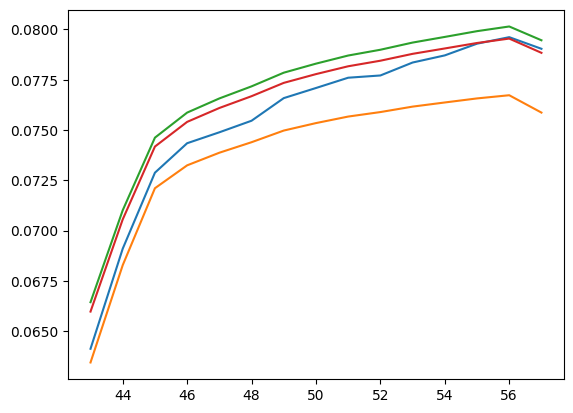

In [2185]:
plt.plot(RPB)
plt.plot(R_CHECK)
plt.plot(RL_CHECK)
plt.plot(RL2_CHECK)


# plt.plot(OP2.to_numpy()*0.04)

In [2187]:
I_l ,RPB[-num]

(0.0794637506273059, nan)

ValueError: x and y must have same first dimension, but have shapes (58,) and (56,)

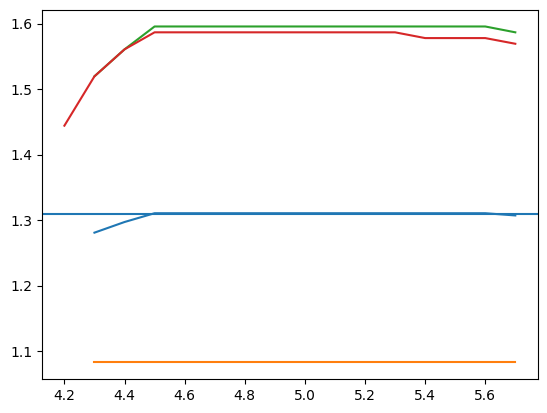

In [2186]:
plt.plot(TLO_back_info['cluster_info']['mean_O+']-TLO_back_info['cluster_info']['mean_O0'])
plt.plot(TLO_back_info['cluster_info']['min_O+']-TLO_back_info['cluster_info']['mean_O0'])
plt.plot(TLO_back_info['cluster_info']['max_O+']-TLO_back_info['cluster_info']['mean_O0'])
plt.plot(np.abs(TLO_back_info['cluster_info']['min_O-'])-TLO_back_info['cluster_info']['mean_O0'])
# plt.axhline(O_O+shift_O)
plt.axhline(F_OR(O_ps[-2]))

# plt.plot(Ks_back,F_OR(O_ps))
plt.plot(Ks_back,O_O+ shift_OFA+O_P2A)
plt.plot(Ks_back,O_O+F_S(Ks_back*TLO_back_info['r_info']['r+_total'].to_numpy(float))-shift_Os/2+Ks_back*TLO_back_info['r_info']['r+_total'].to_numpy(float),color='black')
plt.plot(Ks_back,O_O+F_S(Ks_back*TLO_back_info['r_info']['r+_total'].to_numpy(float))-shift_Os/2,color='black')
plt.plot(Ks_back,F_OR(O_ps) +shift_Os/2)



# plt.axhline(F_OR(3))
# # plt.plot(Ks_back,F_OR(O_ps)+Ks_back*TLO_back_info['r_info']['r+_total'] - F_S(Ks_back*TLO_back_info['r_info']['r+_total'].to_numpy(float)))
# # plt.plot(Ks_back,shift_Os+O_O+Ks_back*TLO_back_info['r_info']['r+'])
# # plt.plot(Ks_back,F_OR(O_ps)-Ks_back*TLO_back_info['r_info']['r+_total'])
# # plt.plot(Ks_back,O_O+F_S(Ks_back*TLO_back_info['r_info']['r+_total'].to_numpy(float)))#+Ks_back*TLO_back_info['r_info']['r+_total'])
# plt.plot(Ks_back,O_O+F_S(Ks_back*TLO_back_info['r_info']['r+_total'].to_numpy(float))+Ks_back*TLO_back_info['r_info']['r+_total']-shift_Os.fillna(0)/2)
# # plt.plot(Ks_back,O_O+2*Ks_back*TLO_back_info['r_info']['r+_total'])#-shift_Os.fillna(0)/2)
# # plt.plot(Ks_back,O_O+Ks_back*TLO_back_info['r_info']['r+_total']+shift_Os.fillna(0).iloc[-1])
# plt.plot(Ks_back,O_O+shift_Os.fillna(0) )
# # plt.plot(Ks_back,O_O+F_S(Ks_back*TLO_back_info['r_info']['r+_total'].to_numpy(float))-shift_Os.fillna(0)/2 +Ks_back*TLO_back_info['r_info']['r+_total'])
# plt.plot(Ks_back,O_O+F_S(Ks_back*TLO_back_info['r_info']['r+_total'].to_numpy(float))-shift_Os.fillna(0)/2)# +Ks_back*TLO_back_info['r_info']['r+_total'])
# plt.plot(Ks_back,O_O+F_S(Ks_back*TLO_back_info['r_info']['r+_total'].to_numpy(float))-shift_Os.fillna(0)/2 +Ks_back*TLO_back_info['r_info']['r+_total'])
# plt.axhline(shift_Os.fillna(0).iloc[-1] + O_O)
for K_,O in zip(CLUP.index,CLUP.to_numpy()):
    try:
        plt.plot(K_*np.ones_like(O),omega[O],',')
    except IndexError:pass
plt.axhline(O_O)
# plt.xlim(4,5.5)

In [2119]:
shift_O = (K**2*r0*rp)/(2*m*(1/m**2+(O_O)**2)) + (K**2*rp*rp)/(2*m*(1/m**2+(O_O)**2))

In [2120]:
O_O , OP.iloc[-1]

(1.049990775725811, 1.0471749370550163)

In [2121]:
F_S,F_OR = get_shift(OP.iloc[-1])

In [2122]:
shift_O2 = F_OR(OP2.iloc[-1]) - OP.iloc[-1]

In [2123]:
F_S,F_OR = get_shift(OP.iloc[-1])

In [2124]:
OP2

0.0         NaN
0.1         NaN
0.2         NaN
0.3         NaN
0.4         NaN
0.5         NaN
0.6         NaN
0.7         NaN
0.8         NaN
0.9         NaN
1.0         NaN
1.1         NaN
1.2         NaN
1.3         NaN
1.4         NaN
1.5         NaN
1.6         NaN
1.7         NaN
1.8         NaN
1.9         NaN
2.0         NaN
2.1         NaN
2.2         NaN
2.3         NaN
2.4         NaN
2.5         NaN
2.6         NaN
2.7         NaN
2.8         NaN
2.9         NaN
3.0         NaN
3.1         NaN
3.2         NaN
3.3         NaN
3.4         NaN
3.5         NaN
3.6         NaN
3.7         NaN
3.8         NaN
3.9         NaN
4.0         NaN
4.1    1.463066
4.2    1.516099
4.3    1.556762
4.4    1.556762
4.5    1.556762
4.6    1.556762
4.7    1.556762
4.8    1.556762
4.9    1.556762
5.0    1.556762
5.1    1.556762
5.2    1.556762
5.3    1.556762
5.4    1.556762
5.5    1.556762
dtype: object

In [2022]:
OP2.iloc[-2]

1.3922848285760574

In [ ]:
plt.axvline(0.8)
plt.axvline(1.215)
plt.axvline(-1.1)
plt.axvline(-1.48)

In [2189]:
# d,u,rs_db2,rs_ub2= get_r_sec0_np(Ks_back,m,0.8,1.215,F0_R0u,F_S,F_OR,samples=40)
d,u,rs_db2,rs_ub2= get_r_sec0_np(Ks_back,m,O_O,O_2O,F0_R0u,F_S,F_OR,samples=40)

In [2058]:
d,u,rs_db3,rs_ub3= get_r_sec0_np(Ks_back,m,1.1,1.48,F0_R0u,F_S,F_OR,samples=40)


In [2060]:
O_O

0.8233884077303855

In [1707]:
d,u,rs_db3,rs_ub3= OSP2.get_r_sec0_np(Ks_back,r0,-shift_O,m,OP.iloc[-1],OP2.iloc[-2],F0_R0u,samples=30)

ValueError: x and y must have same first dimension, but have shapes (58,) and (56,)

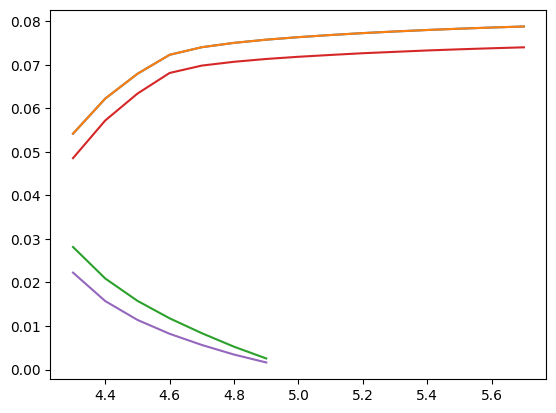

In [2190]:
plt.plot(Ks_back,rs_ub2)
plt.plot(Ks_back,rs_ub2)
plt.plot(Ks_back,rs_db2)
plt.plot(Ks_back,u)
plt.plot(Ks_back,d)
plt.plot(Ks_back,rs_ub3)

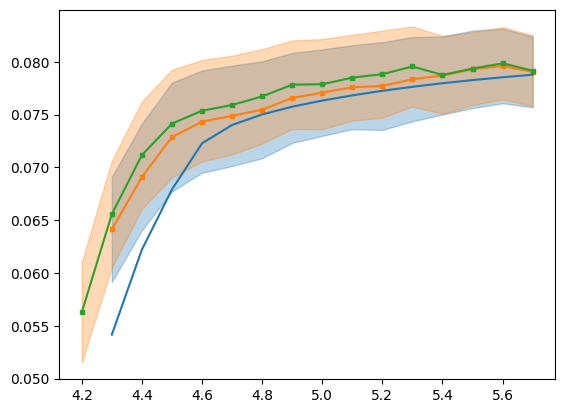

In [2191]:
plt.plot(Ks_back,rs_ub2,zorder=4)
# plt.plot(Ks_back,rs_ub3,zorder=3)
# plt.plot(Ks_back,u,zorder=3)
# plt.plot(Ks_back,rs_db2)
# plt.plot(Ks_back,r_su_l)

plt.plot(r_info_back[['r+','r-']],marker='s',markersize=3)
# plt.plot(r_info_back[['r+_total','r-_total']],marker='s',markersize=3)
plt.fill_between(r_info_back['r+'].index,(r_info_back['r+']-r_info_back['sig+']).to_numpy(float),
                 (r_info_back['r+']+r_info_back['sig+']).to_numpy(float),color='tab:blue',alpha=0.3)

plt.fill_between(r_info_back['r-'].index,(r_info_back['r-']-r_info_back['sig-']).to_numpy(float),
                 (r_info_back['r-']+r_info_back['sig-']).to_numpy(float),color='tab:orange',alpha=0.3)

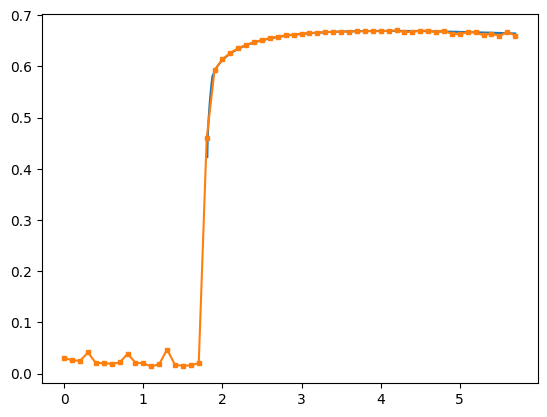

In [2192]:
K_ = np.linspace(0,K,10000)
plt.plot(K_,F0_RMu(K_))
plt.plot(r_info_back[['r_mean']],marker='s',markersize=3)


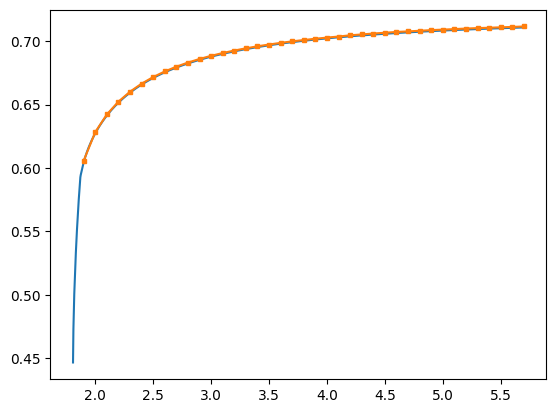

In [2193]:
plt.plot(K_,F0_R0u(K_))
plt.plot(r_info_back[['r0']],marker='s',markersize=3)


In [568]:
r0 = r_info_back['r0'].to_numpy(float)[-1]
I_FR0u = interpolate.interp1d(F_R0u(K_),K_)
K_match = I_FR0u(r0)
O_O = 4/np.pi * np.sqrt(F_RMu(K_match)*K_match/m) - 0.3056*1/np.sqrt(K_match*F_RMu(K_match)*m**3)

TypeError: len() of unsized object

In [233]:
norm.ppf(norm.cdf(1))

1.0

In [106]:
O_O,O_0

(array([0.85665661]), 0.8567041818744332)

In [174]:
O_O

array([0.85658561])

In [177]:
F_S(O_P2)

array([0.29788477])

In [85]:
r_clu_info['r_clu_mean']['+'][-1],rs_u

(0.11301200829543023,
 array([       nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan, 0.19172772, 0.19564482, 0.19827604, 0.20092207,
        0.19932329, 0.19889241, 0.19641007, 0.19475025, 0.19272833,
        0.19078069, 0.18892807, 0.18698043, 0.18492546, 0.18281857,
        0.18065397, 0.17838015, 0.17606848, 0.17370738, 0.17126438,
        0.16879207, 0.16631774, 0.16375148, 0.16119754, 0.15862196,
        0.15603237, 0.15343403, 0.15082365, 0.14824831, 0.14563451,
        0.14305691]))

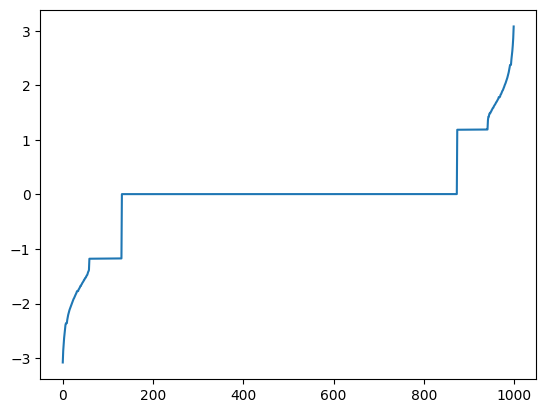

In [1528]:
plt.plot(cluster_info['avg_dtheta_last'])

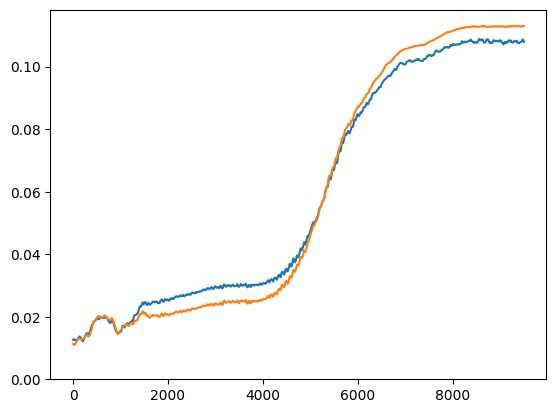

In [82]:
plt.plot(r_clu_info['r_clu_mean']['+_total'])
plt.plot(r_clu_info['r_clu_mean']['+'])
# plt.axhline(rs_u)
plt.ylim(0)
plt.show()


In [19]:
r_clu_info['r_clu_mean']

{'0': array([0.02757801, 0.02758344, 0.02758615, ..., 0.60905884, 0.60905467,
        0.60905097]),
 '+_total': array([0.0123671 , 0.01235182, 0.01233835, ..., 0.03667878, 0.03664274,
        0.03660761]),
 '-_total': array([0.01330191, 0.01329543, 0.01328871, ..., 0.03972352, 0.03971624,
        0.03970582])}

In [1050]:
np.rad2deg(np.arctan(1.46/1))

55.59152774797138

# SEC cluster check new

In [1789]:
def g_sec(x,Or,Om):
    g = norm.pdf(x,-Or,1)
    dO = abs(Or-Om)
    return np.where(x<-dO,1e-6,g)

In [1802]:
def F_2(r,K,m,r_0,O_pm,F_S,g=g_sec):
    X = K*r
    a = 1/np.sqrt(X*m)
    b = 4/np.pi * a - 0.3056*a**3
    bs = np.where(np.where(a>1.193,1,b)>=1,1,b)
    O_pm = 4/np.pi*np.sqrt(K*r_0/m) - 0.3056/np.sqrt(K*r_0*m**3)
    shift_O = +(K**2*r*r_0)/(2*m*(1/m**2+(O_pm)**2)) +(K**2*r*r)/(2*m*(1/m**2+(O_pm)**2))
    O_p = bs*X
    shift_temp = F_S(O_p-shift_O)

    integrand_lock = lambda x:g(x,O_pm+shift_temp,O_pm)*np.sqrt(1-((x)/X)**2)
    integrand_drift = lambda x:1/(2*(m*(x+shift_temp)**2+1/m))*g(x,O_pm-shift_O,O_pm)

    OM = -shift_temp
    OP = O_p-O_pm-shift_temp
    I_l,err = quad(integrand_lock, -OM,+OP,limit=200)
    I_d,err = quad(integrand_drift,OP,np.inf,limit=200)

    return I_l/X - I_d,I_l/X,-I_d 

get_F2 = np.vectorize(F_2)

def get_r_sec(K,m,FR,samples=200):
    r0_ =  FR(K)
    r_sd,r_su = np.nan,np.nan
    r_su_d,r_su_l = np.nan,np.nan

    O_pm = 4/np.pi*np.sqrt(K*r0_/m) - 0.3056/np.sqrt(K*r0_*m**3)
    F_S,F_OR = get_shift(O_pm)

    if (K == 0)or (m==0):
        return r_sd,r_su#,r_su_d,r_su_l
    r_test = np.linspace(1e-5,(1-r0_)/2,samples)
    F2,Fl,Fd = get_F2(r_test,K,m,r0_,O_pm,F_S)
    R2_interpolate  = interpolate.interp1d(r_test,F2, kind='linear',bounds_error=False)
    Rl_interpolate  = interpolate.interp1d(r_test,Fl, kind='linear',bounds_error=False)
    r_test2 = np.linspace(1e-5,(1-r0_)/2,5000)
    Fs = R2_interpolate(r_test2)
    Fls = Rl_interpolate(r_test2)
    cross_point = np.sign((Fs[0:-1]-1/K)*(Fs[1:]-1/K))*(-0.5) + 0.5
    arg_check, = np.where(cross_point)

    r_sec = (r_test2[arg_check] +r_test2[arg_check+1])/2
    F_ls = (Fls[arg_check] +Fls[arg_check+1])/2
    if len(r_sec)==2:
        r_sd,r_su = r_sec
        r_sd_l,r_su_l = F_ls[0]*K*r_sd,F_ls[1]*K*r_su

    if len(r_sec)==1:
        r_su = r_sec
        r_su_l = F_ls*K*r_su
    return r_sd,r_su#,r_sd_l,r_su_l


get_r_sec_np = np.vectorize(get_r_sec)

In [1804]:
rs_d2,rs_u2= get_r_sec_np(Ks,m,F_RMu,samples=30) 

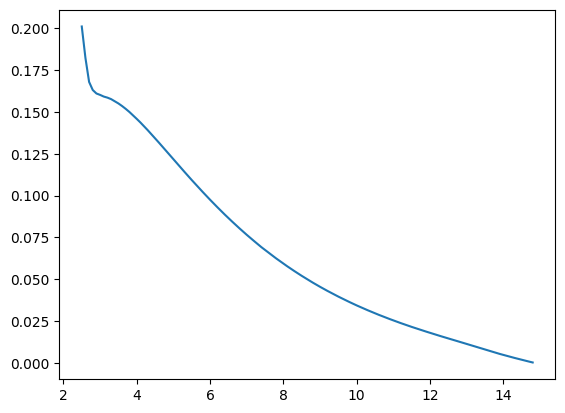

In [1806]:
plt.plot(Ks,rs_u)
plt.plot(Ks,rs_u2)


In [69]:
import numpy as np
A =np.load('Ensembles/KM space/N = 1000 K = 5 11.npz',allow_pickle=True)

In [70]:
print(*A.keys())

Ks ms S0 SP SM R0 RM0 RP RPT RM RMT SIG V0 VP VM SIGP SIGM


In [71]:
import matplotlib.pyplot as plt

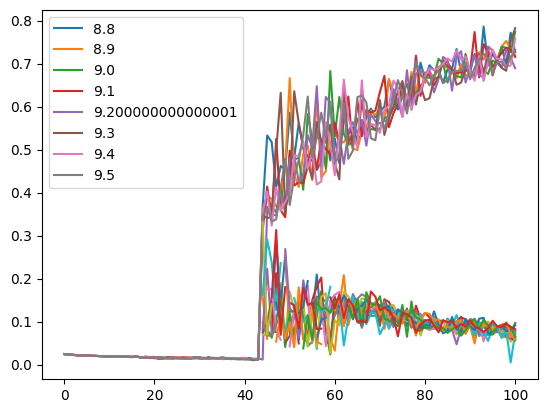

In [72]:
plt.plot(A['RM0'],label=A['ms'][11])
plt.plot(A['RP'])
plt.plot(A['RM'])
plt.legend()